In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib.data_loader import load_data
from lib.neural_layer import NeuralLayer
from lib.neural_network import NeuralNetwork

# Step 1: Load and Inspect the Data

In [2]:
# Load the MNIST dataset
train_data = load_data('data/mnist_train.csv')
test_data = load_data('data/mnist_test.csv')

Loading data from data/mnist_train.csv
Loaded 60000 samples
Loading data from data/mnist_test.csv
Loaded 10000 samples


In [3]:
# Display a sample image from the training data
def show_sample_image(data, index=0):
    data_x, data_y = data
    image = data_x[index].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {np.argmax(data_y[index])}')
    plt.axis('off')
    plt.show()

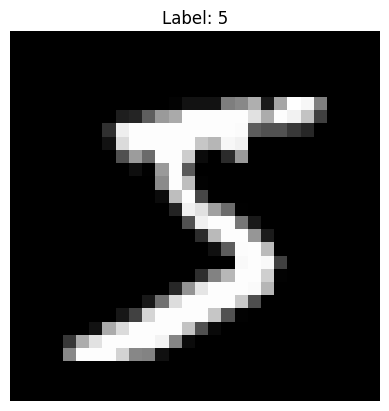

In [4]:
# Display the first image in the training data
show_sample_image(train_data, index=0)

# Step 2: Create and Inspect the Neural Network

In [5]:
# Initialize the neural network
nn = NeuralNetwork()
nn.add_layer(NeuralLayer(784, 128, "relu"))
nn.add_layer(NeuralLayer(128, 64, "relu"))
nn.add_layer(NeuralLayer(64, 10, "softmax"))

# Display the structure of the neural network
print(nn)

Layer 1: 784 -> 128, Activation: relu, Weights Shape: (784, 128), Bias Shape: (1, 128)
Layer 2: 128 -> 64, Activation: relu, Weights Shape: (128, 64), Bias Shape: (1, 64)
Layer 3: 64 -> 10, Activation: softmax, Weights Shape: (64, 10), Bias Shape: (1, 10)


# Step 3: Train the Neural Network and Save the Model

In [6]:
# Use stochastic gradient descent to train the neural network
nn.stochastic_gradient_descent(train_data,
                               epochs=5,
                               batch_size=32,
                               learning_rate=0.01,
                               test_data=test_data)

Epoch 1/5 - Loss: 0.7952, Accuracy: 0.7714
Test Loss: 0.7888, Test Accuracy: 0.7713
Epoch 2/5 - Loss: 0.5975, Accuracy: 0.8255
Test Loss: 0.6039, Test Accuracy: 0.8216
Epoch 3/5 - Loss: 0.5323, Accuracy: 0.8387
Test Loss: 0.5477, Test Accuracy: 0.8354
Epoch 4/5 - Loss: 0.4497, Accuracy: 0.8645
Test Loss: 0.4628, Test Accuracy: 0.8625
Epoch 5/5 - Loss: 0.4035, Accuracy: 0.8789
Test Loss: 0.4154, Test Accuracy: 0.8762


In [7]:
# Save the trained neural network
nn.save("my_model.npy")

Saving model to my_model.npy
Saved model:
Layer 1: 784 -> 128, Activation: relu, Weights Shape: (784, 128), Bias Shape: (1, 128)
Layer 2: 128 -> 64, Activation: relu, Weights Shape: (128, 64), Bias Shape: (1, 64)
Layer 3: 64 -> 10, Activation: softmax, Weights Shape: (64, 10), Bias Shape: (1, 10)


# Step 4: Visualize Predictions

In [8]:
# Optionally, load the pretrained model
#nn.load("pretrained_model.npy")

In [9]:
def show_predictions(nn, data, num_samples=5):
    data_x, data_y = data
    plt.figure(figsize=(15, 15))

    for i in range(num_samples):
        index = np.random.randint(0, len(data_x))
        image = data_x[index].reshape(28, 28)
        prediction = nn.feed_forward(data_x[index])
        predicted_label = np.argmax(prediction)

        # Display the image and the prediction
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Prediction: {predicted_label}')
        plt.axis('off')

        # Display the prediction probabilities
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.bar(range(10), prediction[0])
        plt.xlabel('Digit')
        plt.ylabel('Probability')
        plt.xticks(range(10))

    plt.tight_layout()
    plt.show()

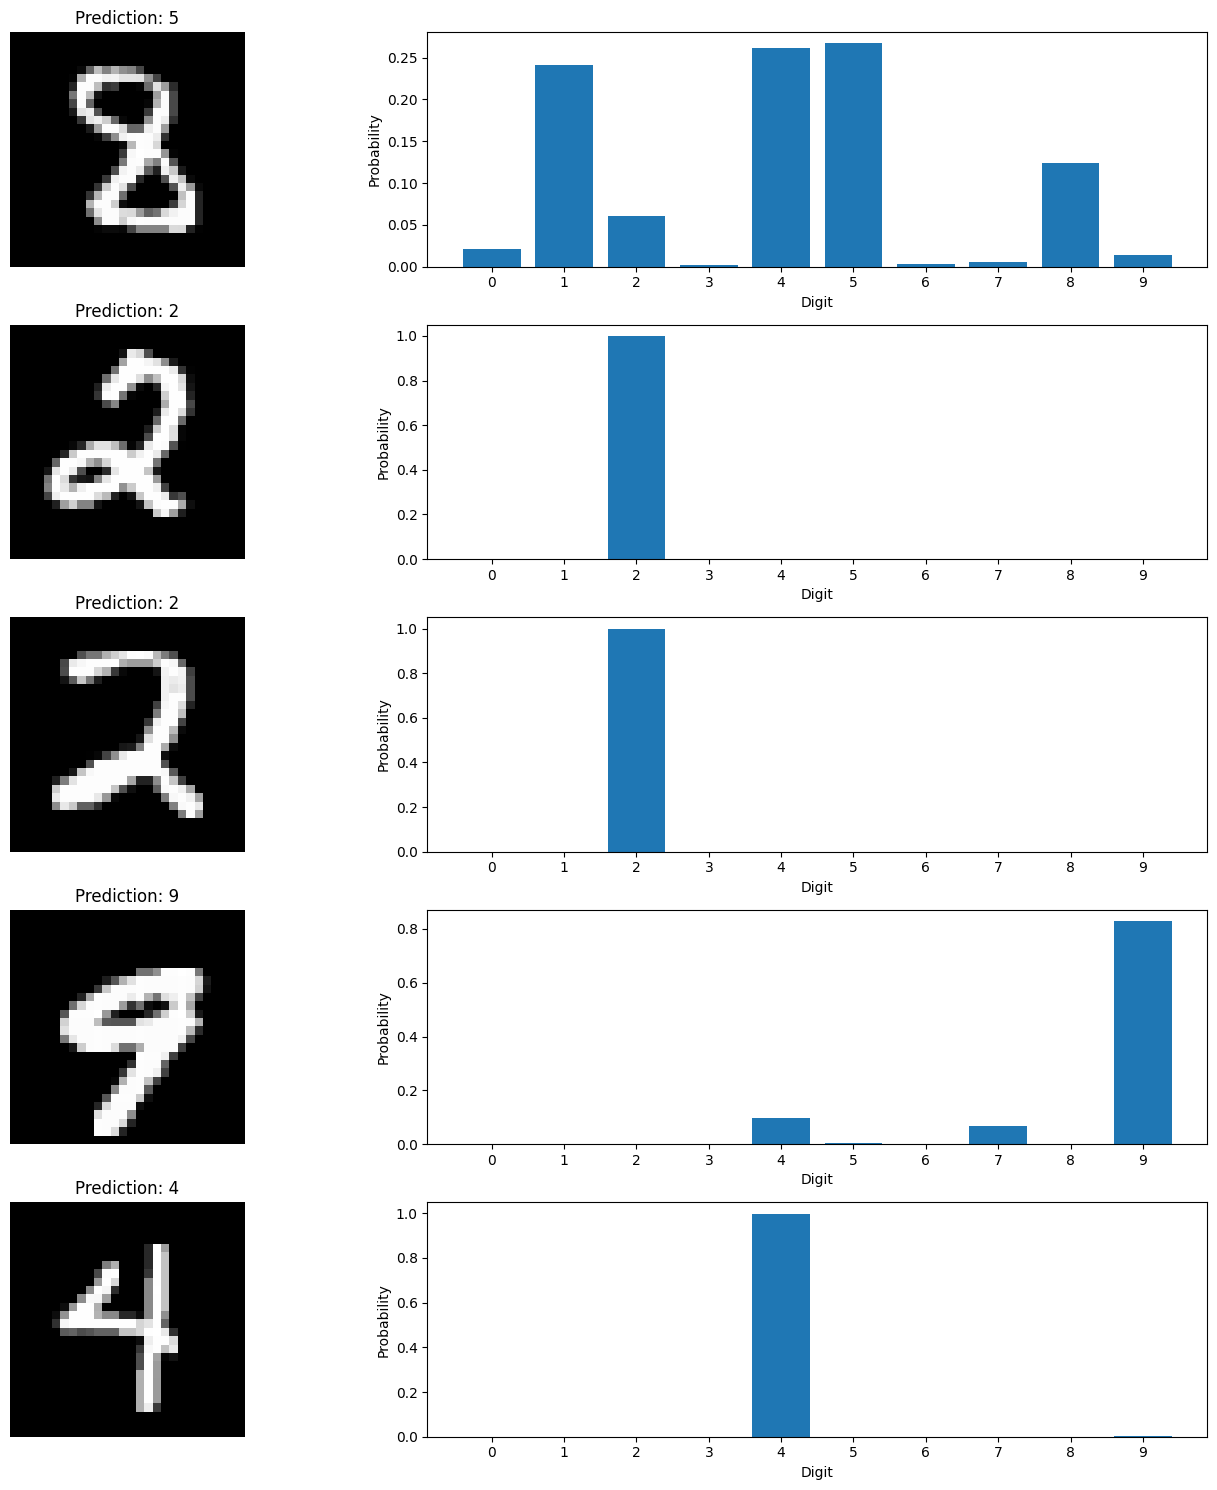

In [10]:
# Display predictions for random samples from the test data
show_predictions(nn, test_data)